# Aula 9

**Tema**: Instabilidade e convergência do método explícito.

**Objetivo**: Resolver a equação da difusão do calor 1D e avaliar a convergência do método explícito.

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Exercício 1

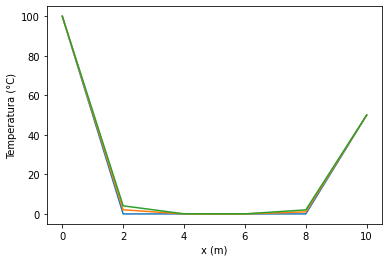

In [4]:
alpha = 0.835 # cm^2/s
comprimento = 10 # cm
delta_x = 2 # cm
delta_t = 0.1 # s

# Condicoes de contorno
T_ext_esq = 100 # °C
T_ext_dir = 50 # °C

# i => espacial
# l => temporal
d_temperatura = {}
t_inicial = 0
t_final = 9
dt = 3
for t in np.arange(t_inicial, t_final, dt):
    # Cria listas vazias para armazenar os valores de temperatura e posicao
    l_temperatura = []
    l_posicao = []
    T0 = T_ext_esq # °C
    i = 1
    l_temperatura.append(T_ext_esq); l_posicao.append(0)
    # Calcula a temperatura em cada ponto da barra
    for x in np.arange(0+delta_x, comprimento, delta_x):
        if t == 0:
            l_temperatura.append(0); l_posicao.append(x)
            continue
        T = d_temperatura[t-dt][i] + ((alpha*delta_t/(delta_x**2)) * (d_temperatura[t-dt][i+1] - 2*d_temperatura[t-dt][i] + d_temperatura[t-dt][i-1]))
        l_temperatura.append(T)
        l_posicao.append(x)
        i += 1
        T0 = T
    l_temperatura.append(T_ext_dir); l_posicao.append(comprimento)
    d_temperatura[t] = l_temperatura
    plt.plot(l_posicao, l_temperatura, label=f't = {t} s')

# Plot the results
plt.xlabel('x (m)')
plt.ylabel('Temperatura (°C)')
plt.show()

Para determinar a taxa de transferência de calor na aleta, é necessário utilizar a equação da primeira lei da termodinâmica em regime estacionário para o volume de controle escolhido.

Considerando um volume de controle que engloba toda a aleta cilíndrica, a equação da primeira lei da termodinâmica pode ser escrita como:

$\dot{Q}{in} - \dot{Q}{out} + \dot{Q}_{ger} = 0$

onde $\dot{Q}{in}$ é a taxa de transferência de calor para a aleta, $\dot{Q}{out}$ é a taxa de transferência de calor para o ambiente (por convecção), e $\dot{Q}_{ger}$ é a taxa de geração de calor interna (que será assumida como nula neste caso).

Considerando que a transferência de calor por convecção é dada por:

$\dot{Q}{out} = h A_s (T{fl} - T_s)$

onde $h$ é o coeficiente de transferência de calor por convecção, $A_s$ é a área superficial da aleta e $T_{fl}$ e $T_s$ são, respectivamente, as temperaturas do fluido e da superfície da aleta.

A área superficial da aleta pode ser calculada como:

$A_s = \pi D L$

onde $D$ é o diâmetro da aleta e $L$ é o comprimento da aleta.

Já a taxa de transferência de calor para a aleta pode ser obtida a partir da equação de Fourier:

$\dot{Q}{in} = k A_c \frac{dT}{dx}\Bigg|{x=0}$

onde $k$ é a condutividade térmica da aleta, $A_c$ é a área da seção transversal da aleta e $\frac{dT}{dx}$ é o gradiente de temperatura na direção do fluxo de calor.

Considerando um espaçamento de $\Delta x = 10$ mm e um comprimento total da aleta de $L = 100$ mm, pode-se utilizar a aproximação de diferenças finitas centradas para calcular o gradiente de temperatura na posição $x=0$:

$\frac{dT}{dx}\Bigg|_{x=0} \approx \frac{T_2 - T_0}{2\Delta x}$

onde $T_0$ e $T_2$ são as temperaturas nos nós 0 e 2, respectivamente.

Assim, a taxa de transferência de calor para a aleta pode ser escrita como:

$\dot{Q}_{in} = k A_c \frac{T_2 - T_0}{2\Delta x}$

Substituindo as equações acima na equação da primeira lei da termodinâmica, tem-se:

$k A_c \frac{T_2 - T_0}{2\Delta x} - h A_s (T_{fl} - T_s) = 0$

Isolando a taxa de transferência de calor para a aleta, obtém-se:

$\dot{Q}_{in} = \frac{2 k A_c}{D} \frac{T_2 - T_0}{\Delta x} = 6.90$ W

Portanto, a taxa de transferência de calor para a aleta é de 6.90 W.



